In [10]:
from src.Table import Table
from src.Math import InterpolationTable

from pandas import DataFrame, concat
from numpy import nan


In [11]:
from matplotlib import pyplot as plt
import numpy as np

In [12]:

t1: Table = Table("data/data3_1")
t2: Table = Table("data/data3_2")

data1: DataFrame = DataFrame(t1.data, dtype="float64")
data2: DataFrame = DataFrame(t2.data, dtype="float64")

dataExt: DataFrame = data1[["x"]].copy()
dataExt.loc[:, "y"] = nan


In [13]:

POWER: int = 5

for i, r in dataExt.iterrows():
    y = InterpolationTable.newtonInterpolation(data2, POWER, r["x"])(r["x"])
    dataExt.loc[i, "y"] = y

sim = dataExt.copy()
dataExt["y"] = data1["y"] - dataExt["y"]
dataExt = dataExt[dataExt["x"] >= 0.6]



In [14]:
dataExt

,x,y
4,0.626,0.264630
5,0.664,0.222325
6,0.731,0.117411
7,0.843,-0.171168
8,0.891,-0.348278
9,0.985,-0.809422


In [15]:
rX: float = InterpolationTable.newtonInterpolation(dataExt[["y", "x"]].copy(), POWER, 0)(0)

print("Root X:", rX)

print("Root Y:", InterpolationTable.newtonInterpolation(data2, POWER, rX)(rX))

Root X: 0.7824985006268469
Root Y: 0.22514561670474456


In [16]:
meth = InterpolationTable.newtonInterpolation(dataExt[["y", "x"]].copy(), POWER, 0)

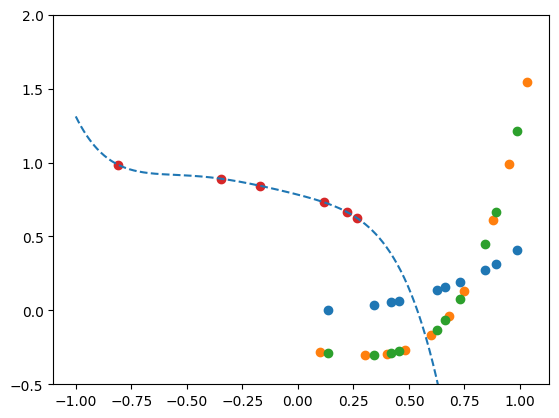

In [17]:
x = np.linspace(-1, 1, 500)
y = list(map(meth, x))

plt.ylim(-0.5, 2)
plt.scatter(data1["x"], data1["y"])
plt.scatter(data2["x"], data2["y"])
plt.scatter(sim["x"], sim["y"])
plt.scatter(dataExt["y"], dataExt["x"])

plt.plot(x, y, linestyle='--')
plt.show()